# Solidworks Simulation Grapher

This python notebook is intended to extract data from a CSV file generated by a SOLIDWORKS  Simulation and aid in graphing the data.<br>
It can help to do some preformating of the data before entering it into this python file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

### Choose File
Place the file in the same directory as the notebook or include the directory path in the following file variable

In [174]:
csv_file_name = "CSVfiles/CFRoundBoom20Kg4Bolts.csv" # tab can auto complete this
SWSimuName = "Simulation Static Force Test (Hover) fails."
df = pd.read_csv(csv_file_name,skiprows=(0,1,3),na_values=SWSimuName).transpose()
df.reset_index(inplace=True)
df.columns = df.iloc[0]
df.drop("Parameter Constraint or Goal",axis='columns',inplace=True)

#### Temp File name holder for auto CSV naming with cleaned data

In [175]:
csv_no_path = csv_file_name[9:-4]
print("File Name:",csv_no_path)

File Name: CFRoundBoom20Kg4Bolts


### Data Cleaning
Run the following set of code on SOLIDWORKS generated CSV files to transform them into the correct format for this notebook.

In [176]:
df.head()

,TubeLength,TubeOD,Mass1,Displacement1,Stress1
0,TubeLength,TubeOD,Mass1,Displacement1,Stress1
1,NaN,NaN,Monitor Only,< 1mm,Minimize
2,NaN,NaN,g,mm,N/mm^2
3,490,10,25.3767,15.3827,351.12
4,360,25,49.9692,0.32583,38.931


In [177]:
# List of rows to drop from the dataframe
rows2Drop = [0,1,2,3,4] # 3 & 4 are the initial and optimal value and will be stored in variables instead
initVal = df.iloc[3]
optiVal = df.iloc[4]
df.drop(rows2Drop,inplace=True)
df.head()

,TubeLength,TubeOD,Mass1,Displacement1,Stress1
5,350,10,18.0545,5.07265,239.16
6,360,10,18.5775,5.51169,246.2
7,370,10,19.1005,6.13473,252.48
8,380,10,19.6235,6.67895,261.79
9,390,10,20.1465,7.20448,269.45


### Removing Useless Rows and Fixing Data Types
Due to strings being in the columns when they are read in from the CSV file the data type ends up being an object instead of a float or int, in most cases. Thus the following will convert all the columns data type to be a float. This can be adjusted accordingly.

In [178]:
# Information about the data entered from CSV file
df = df.astype('float')
df.dropna(inplace=True)
df.info()
# Description of the data
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 5 to 184
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TubeLength     180 non-null    float64
 1   TubeOD         180 non-null    float64
 2   Mass1          180 non-null    float64
 3   Displacement1  180 non-null    float64
 4   Stress1        180 non-null    float64
dtypes: float64(5)
memory usage: 8.4 KB


,TubeLength,TubeOD,Mass1,Displacement1,Stress1
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,525.000000,20.000000,57.725455,6.406071,145.298156
std,104.172719,7.090792,24.877344,9.884256,129.044223
min,350.000000,10.000000,18.054460,0.175610,38.931000
25%,437.500000,15.000000,36.229278,0.899565,55.718750
50%,525.000000,20.000000,55.022855,2.157490,83.209000
75%,612.500000,25.000000,74.900813,6.942153,187.702500
max,700.000000,30.000000,117.736000,48.035810,517.470000


### Ready to graph!
The data frame is named **df** and can be visualised by many different python packages. The ones used here are *seaborn* and *matplotlib*, they are both based on the matplot library but seaborn offers some niceties for plotting.

To see how to manipulate the *pandas* dataframe **df**, checkout their documentation [Click](https://pandas.pydata.org/docs/)

Similarly, there are alot of resources for using *seaborn* and *matplotlib*, often *Shift + Tab* can be helpful and give a description of a function and its parameters. <br>*Shift + Tab is a function of jupyter notebooks and may not work in all forms of notebook.*

### Save Cleaned Data to New .csv File (Optional)

In [179]:
file_path = "cleanedCSVs/clean_"+ csv_no_path +".csv"
df.to_csv(file_path, index=None) # index=None ensures that next time read in the index will start at 0.
print("Path:",file_path)

Path: cleanedCSVs/clean_CFRoundBoom20Kg4Bolts.csv


# Graphing Section

## Figure 1: Hole Placement graph
CSV: OblongRailMData

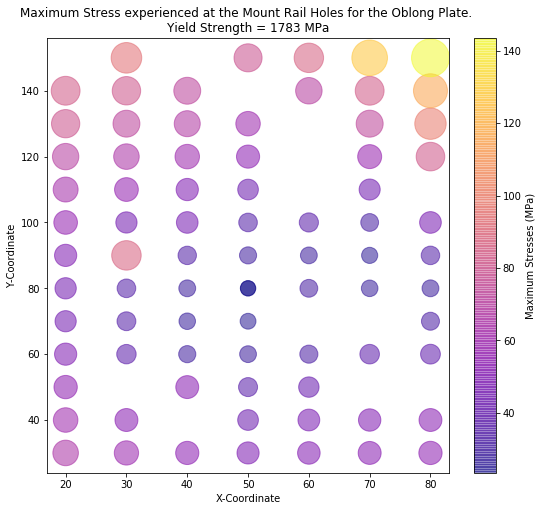

In [7]:
fig = plt.figure(figsize=(9,8))
plt.scatter(x=df['HoleXDist'],y=df['HoleZDist'],s=df['Stress1']*10,c=df['Stress1'],cmap="plasma",alpha=0.5)
plt.xlabel("X-Coordinate")
plt.ylabel("Y-Coordinate")
plt.title("Maximum Stress experienced at the Mount Rail Holes for the Oblong Plate. \nYield Strength = 1783 MPa")
plt.colorbar(label="Maximum Stresses (MPa)")
plt.clim(df['Stress1'].min(),df['Stress1'].max())
plt.show()

#### Saving the graph to an Image

In [8]:
fig.savefig("Figures/F1/HolePlacement.png")

#### Evaluting Data Points

In [9]:
df[(df['Stress1']<=30.0) ] #& ((df['HoleZDist']<70) | (df['HoleZDist']>100))]

,HoleZDist,HoleXDist,XCoOrdCheck,ResDisplacement,ZCoOrdCheck,Stress1
1,80,50,70.0,0.05703,80.0,23.417
31,60,40,60.0,0.04483,60.0,29.441
32,70,40,60.0,0.05478,70.0,27.262
33,80,40,60.0,0.06592,80.0,28.396
44,60,50,70.0,0.04496,60.0,28.173
45,70,50,70.0,0.04444,70.0,25.087
46,80,50,70.0,0.05703,80.0,23.417
47,90,50,70.0,0.06873,90.0,29.283
60,90,60,80.0,0.06210,90.0,28.253
72,80,70,90.0,0.04204,80.0,27.479


In [10]:
df.head()

,HoleZDist,HoleXDist,XCoOrdCheck,ResDisplacement,ZCoOrdCheck,Stress1
1,80,50,70.0,0.05703,80.0,23.417
2,30,20,40.0,0.16144,30.0,65.434
3,40,20,40.0,0.11396,40.0,60.359
4,50,20,40.0,0.07569,50.0,54.498
5,60,20,40.0,0.08198,60.0,49.358


In [14]:
df['Stress1'].max()

143.52

## Figure 2: Hole Sizing and Distance Apart
CSV: RailHoleSizing

In [135]:
df.head()

,HoleSize,HoleSpacing,ResDisplacement,Stress1
5,1.6,10.0,0.04845,63.766
6,2.1,10.0,0.04626,47.451
7,2.6,10.0,0.04495,39.196
8,3.1,10.0,0.04468,31.504
9,3.6,10.0,0.04437,29.309


### Stress Curve

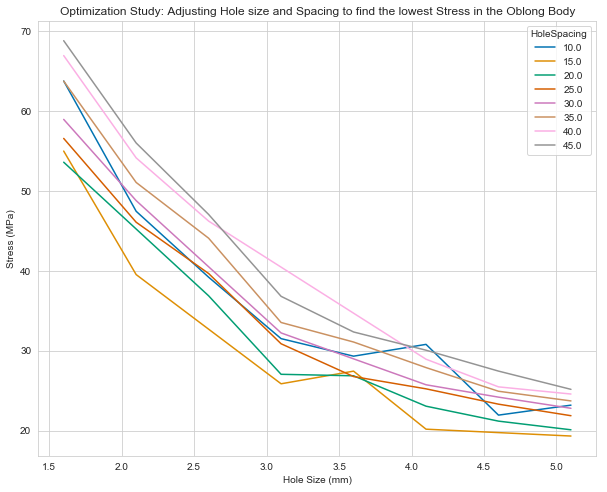

In [136]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=df['HoleSize'],y=df['Stress1'],data=df,hue=df['HoleSpacing'],palette='colorblind')
plt.xlabel("Hole Size (mm)")
plt.ylabel("Stress (MPa)")
plt.title("Optimization Study: Adjusting Hole size and Spacing to find the lowest Stress in the Oblong Body")
plt.show()

#### Saving the Graph to an image

In [128]:
fig.savefig("Figures/F2/HoleStress4SizeSpace.png")

#### Evaluating Data Points

In [150]:
df[df['HoleSpacing']== 15]

,HoleSize,HoleSpacing,ResDisplacement,Stress1
13,1.6,15.0,0.04862,54.987
14,2.1,15.0,0.04634,39.524
16,3.1,15.0,0.04339,25.851
17,3.6,15.0,0.04230,27.434
18,4.1,15.0,0.04133,20.168
20,5.1,15.0,0.03963,19.310


### Displacement Curve

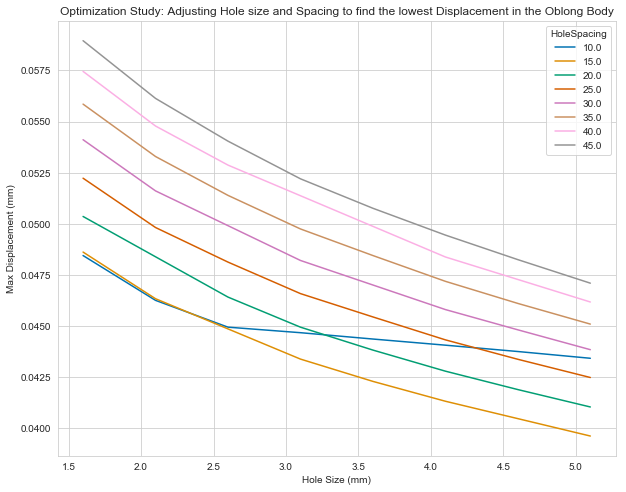

In [137]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=df['HoleSize'],y=df['ResDisplacement'],data=df,hue=df['HoleSpacing'],palette='colorblind')
plt.xlabel("Hole Size (mm)")
plt.ylabel("Max Displacement (mm)")
plt.title("Optimization Study: Adjusting Hole size and Spacing to find the lowest Displacement in the Oblong Body")
plt.show()

#### Saving the graph to an Image

In [130]:
fig.savefig("Figures/F2/HoleDisp4SizeSpace")

#### Evaluating Data Points

In [140]:
df[df['HoleSpacing'] == 10]

,HoleSize,HoleSpacing,ResDisplacement,Stress1
5,1.6,10.0,0.04845,63.766
6,2.1,10.0,0.04626,47.451
7,2.6,10.0,0.04495,39.196
8,3.1,10.0,0.04468,31.504
9,3.6,10.0,0.04437,29.309
10,4.1,10.0,0.04407,30.786
11,4.6,10.0,0.04376,21.928
12,5.1,10.0,0.04343,23.176


## Figure 3: Sqaure Carbon Fiber Boom Length and Diameter Analysis
#### Max Thrust: 20Kg
The total thrust is distributed accross the 6 motors resulting in roughly 3.34Kg of thrust per rotor boom.

*Note*:<br>
20Kg is assumed to be the maximum thrust that can be produced by the power chain and can only be achieved for a short duration of time, likely less than 20 seconds due to constrains on maximum power output from the motors.

Modeled Components for 20Kg thrust production:

|        Name        |      Properties     |      Links     |
|:------------------:|:-------------------:|:-------------------:|
| T-Motor MN4014     |        330kV        |        [Click](https://flyingrobot.co/collections/brushless-motors/products/tmotor-mn4014-330kv)        |
| CF Fixed Propeller | 17" x 6.5" |        [Click](https://flyingrobot.co/collections/7-or-bigger/products/ms1704)        |

#### Minimum Boom Length:

|        Name        |      Value     |      Description     |
|:------------------:|:-------------------:|:-------------------:|
| Mounting Space     |      25mm     | Space from ends to mount motor and fix boom to frame|
| Hole to Hole Dist | 350mm | Dist between motor mount hole and furtherest frame mount hole |
| Mount Dist from Center of Frame | 105mm | Dist from center of frame to closest boom mount hole |
| Rotor Diameter | 432mm | Diameter of the propeller |
| Min Dist Between Motors | 455mm | Suggested min distance between adjacent motor centers, 5% gap between propeller tips |
| Min Boom Length | 375mm | Min boom length including mounting space |
| Effective Boom Length | 480mm | Dist between frame center and boom end, Min boom length + Mount dist from center |

In [180]:
print("Displayed CSV:", csv_no_path)

Displayed CSV: CFRoundBoom20Kg4Bolts


In [2]:
dfSq2Bolts = pd.read_csv("cleanedCSVs/clean_CFSquareBoom20Kg2Bolts.csv")
dfSq4Bolts = pd.read_csv("cleanedCSVs/clean_CFSquareBoom20Kg4Bolts.csv")

In [3]:
dfSq2Bolts.head()

,TubeLength,TubeOD,Displacement1,Mass1,Stress1
0,350.0,10.0,3.22471,23.06575,178.78
1,360.0,10.0,3.53468,23.73175,188.51
2,370.0,10.0,3.86371,24.39775,194.30
3,380.0,10.0,4.21243,25.06375,195.67
4,390.0,10.0,4.58163,25.72975,201.35


In [4]:
dfSq4Bolts.head()

,TubeLength,TubeOD,Displacement1,Mass1,Stress1
0,350.0,10.0,3.05717,23.06575,197.53
1,360.0,10.0,3.35643,23.73175,203.43
2,370.0,10.0,3.67453,24.39775,208.06
3,380.0,10.0,4.01295,25.06375,212.71
4,390.0,10.0,4.37030,25.72975,217.26


#### SOLIDWORKS Optimal Value 

In [87]:
print(optiVal)

0
TubeLength           380
TubeOD                20
Displacement1     0.4568
Mass1            53.1838
Stress1           42.174
Name: 4, dtype: object


In [49]:
#tempDf = df[df['TubeOD']!=10]
disp2Bolts = dfSq2Bolts[(dfSq2Bolts['TubeLength']>=370)&(dfRnd2Bolts['TubeOD']>10)]
disp4Bolts = dfSq4Bolts[dfSq4Bolts['TubeLength']>=370]

### Stress Curve

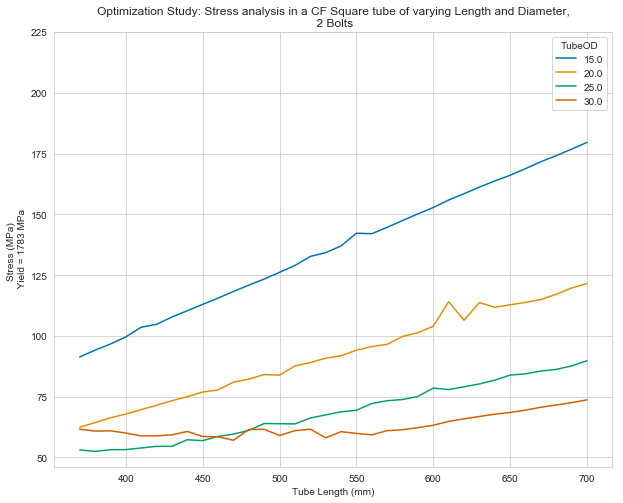

In [59]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=disp2Bolts['TubeLength'],y=disp2Bolts['Stress1'],data=disp2Bolts,hue=disp2Bolts['TubeOD'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Stress (MPa) \n Yield = 1783 MPa")
#plt.yticks([50,75,100,125,150,175,200,225])
plt.title("Optimization Study: Stress analysis in a CF Square tube of varying Length and Diameter,\n 2 Bolts")
plt.show()

In [60]:
fig.savefig("Figures/F3/Sq2BoltsStress_BetterRes.png")

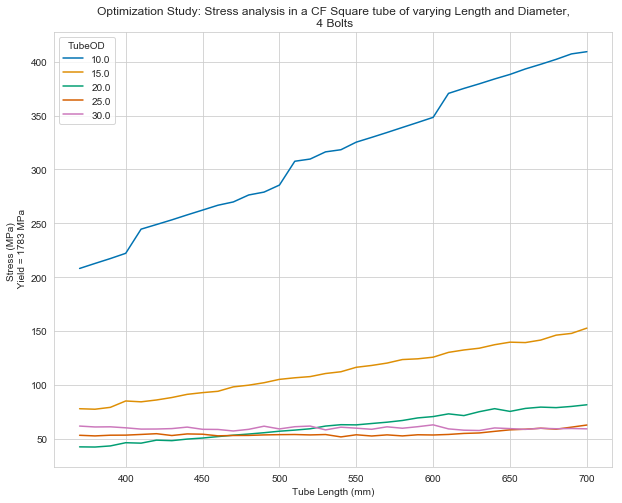

In [14]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=disp4Bolts['TubeLength'],y=disp4Bolts['Stress1'],data=disp4Bolts,hue=disp4Bolts['TubeOD'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Stress (MPa) \n Yield = 1783 MPa")
plt.title("Optimization Study: Stress analysis in a CF Square tube of varying Length and Diameter,\n 4 Bolts")
plt.show()

#### Saving the graph to and Image

In [9]:
fig.savefig("Figures/F3/SquareCFStressAnalysis20kg_2.png")

#### Evaluating Data Points

In [27]:
#df[(df['TubeOD']==20) & (df['TubeLength']<550)]

### Analysis of the Stress Curves
#### Square Tubing:
Both curves are not very smooth 

### Displacement Curve

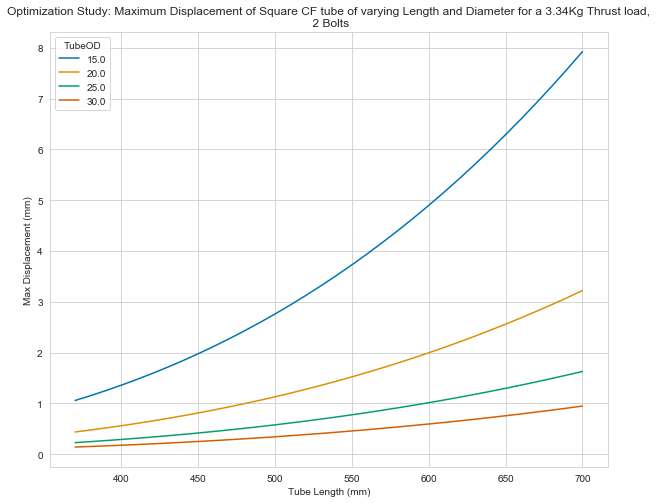

In [61]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=disp2Bolts['TubeLength'],y=disp2Bolts['Displacement1'],data=disp2Bolts,hue=disp2Bolts['TubeOD'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Max Displacement (mm)")
plt.title("Optimization Study: Maximum Displacement of Square CF tube of varying Length and Diameter for a 3.34Kg Thrust load,\n 2 Bolts")
plt.show()

In [62]:
fig.savefig("Figures/F3/Sq2BoltsDisplacement_BetterRes.png")

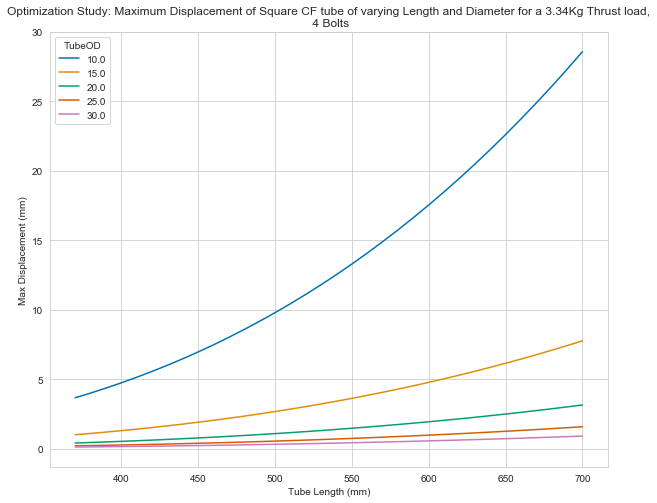

In [20]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=disp4Bolts['TubeLength'],y=disp4Bolts['Displacement1'],data=disp4Bolts,hue=disp4Bolts['TubeOD'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Max Displacement (mm)")
plt.title("Optimization Study: Maximum Displacement of Square CF tube of varying Length and Diameter for a 3.34Kg Thrust load,\n 4 Bolts")
plt.show()

#### Saving the Graph to an Image

In [11]:
fig.savefig("Figures/F3/SquareCFDispAnalysis20kg_2.png")

#### Evaluating Data Points

In [22]:
df[df['TubeOD']==20]

,TubeLength,TubeOD,Displacement1,Stress1
27,250.0,20.0,0.12479,43.489
28,275.0,20.0,0.16963,45.569
29,300.0,20.0,0.22424,49.855
30,325.0,20.0,0.28965,53.810
31,350.0,20.0,0.36671,58.040
32,375.0,20.0,0.45643,70.947
33,400.0,20.0,0.55985,75.886
34,425.0,20.0,0.67789,72.421
35,450.0,20.0,0.81151,76.762
36,475.0,20.0,0.96197,81.298


## Strain Analysis

In [140]:
df['Strain'] = df['Displacement1']/df['TubeLength']
df.head()
temp = df[df['TubeOD']==30]
displayDf = temp

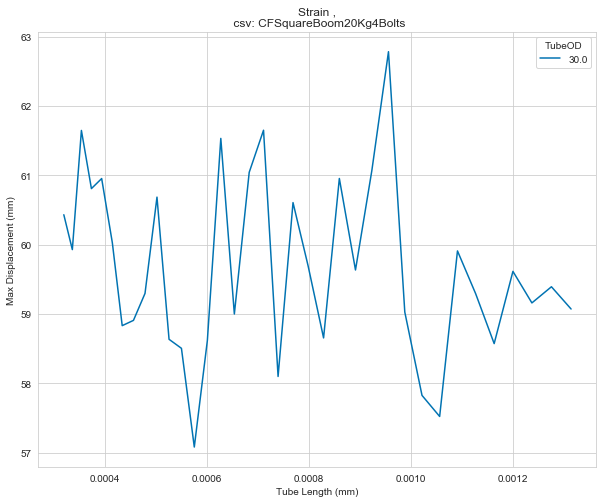

In [141]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=displayDf['Strain'],y=displayDf['Stress1'],data=displayDf,hue=displayDf['TubeOD'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Max Displacement (mm)")
plt.title("Strain ,\n csv: "+csv_no_path)
plt.show()

### Youngs Modulus

In [15]:
#yM = np.array(df['Stress1']/df['Strain'])
#(yM*10**6)/1.89442006e+11

## Figure 4: Round Carbon Fiber Boom Length and Diameter Analysis

In [52]:
print("Displayed CSV:",csv_no_path)

Displayed CSV: CFRoundBoom20Kg4Bolts


In [16]:
dfRnd2Bolts = pd.read_csv("cleanedCSVs/clean_CFRoundBoom20Kg2Bolts.csv")
dfRnd4Bolts = pd.read_csv("cleanedCSVs/clean_CFRoundBoom20Kg4Bolts.csv")

In [17]:
dfRnd2Bolts.head()

,TubeLength,TubeOD,Mass1,Displacement1,Stress1
0,350.0,10.0,18.05446,5.35939,241.96
1,360.0,10.0,18.57748,5.81635,248.60
2,370.0,10.0,19.10049,6.45785,256.24
3,380.0,10.0,19.62351,7.02198,265.07
4,390.0,10.0,20.14653,7.56691,271.43


In [18]:
dfRnd4Bolts.head()

,TubeLength,TubeOD,Mass1,Displacement1,Stress1
0,350.0,10.0,18.05446,5.07265,239.16
1,360.0,10.0,18.57748,5.51169,246.20
2,370.0,10.0,19.10049,6.13473,252.48
3,380.0,10.0,19.62351,6.67895,261.79
4,390.0,10.0,20.14653,7.20448,269.45


#### SOLIDWORKS Optimal Value:

In [54]:
print(optiVal)

0
TubeLength           360
TubeOD                25
Mass1            49.9692
Displacement1    0.32583
Stress1           38.931
Name: 4, dtype: object


In [46]:
#tempDf = df[df['TubeOD']!=10]
dispRnd2Bolts = dfRnd2Bolts[(dfRnd2Bolts['TubeLength']>=370)&(dfRnd2Bolts['TubeOD']>10)]
dispRnd4Bolts = dfRnd4Bolts[dfRnd4Bolts['TubeLength']>=370]

### Stress Curve

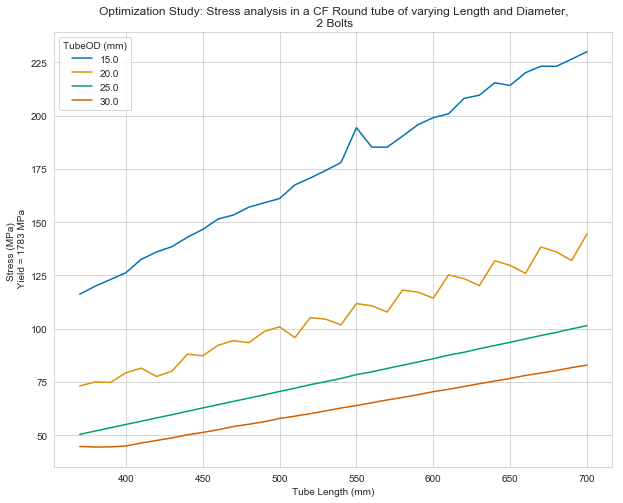

In [54]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=dispRnd2Bolts['TubeLength'],y=dispRnd2Bolts['Stress1'],data=dispRnd2Bolts,hue=dispRnd2Bolts['TubeOD'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Stress (MPa) \n Yield = 1783 MPa")
plt.legend(title="TubeOD (mm)")
plt.title("Optimization Study: Stress analysis in a CF Round tube of varying Length and Diameter,\n 2 Bolts")
plt.show()

In [55]:
fig.savefig("Figures/F4/Rnd2BoltsStress_BetterRes.png")

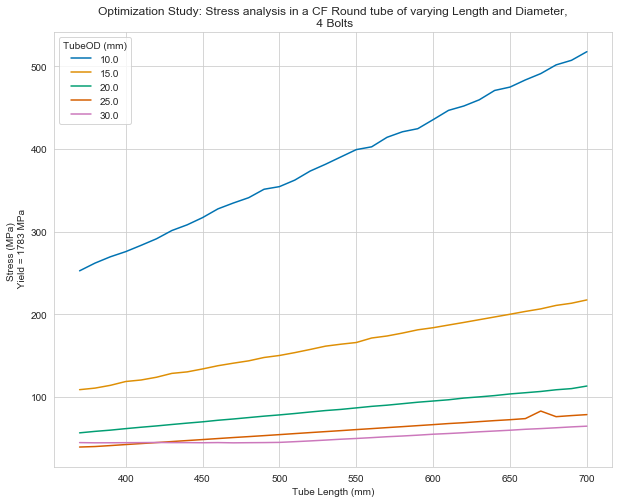

In [24]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=dispRnd4Bolts['TubeLength'],y=dispRnd4Bolts['Stress1'],data=dispRnd4Bolts,hue=dispRnd4Bolts['TubeOD'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Stress (MPa) \n Yield = 1783 MPa")
plt.legend(title="TubeOD (mm)")
plt.title("Optimization Study: Stress analysis in a CF Round tube of varying Length and Diameter,\n 4 Bolts")
plt.show()

#### Saving graph to an Image

In [11]:
fig.savefig("Figures/F4/SquareCFStressAnalysis20kg.png")

#### Evaluating Data Points

In [60]:
df[(df['TubeLength']<=400) & (df['TubeOD']==30)]

,TubeLength,TubeOD,Mass1,Displacement1,Stress1
149,350.0,30.0,58.74569,0.17561,44.481
150,360.0,30.0,60.43113,0.19184,44.677
151,370.0,30.0,62.11657,0.20899,44.748
152,380.0,30.0,63.80201,0.22725,44.497
153,390.0,30.0,65.48745,0.24655,44.556
154,400.0,30.0,67.17289,0.26688,44.645


### Analysis on the Stress Curve:
CSV:
Expect the curves to be very similar to each other as the only property changing is the **Diameter**, all other parameters material, force, holes... are constant.

Some of the curves have sharp jumps or dips with no real explanation as to why and I think they must have some kind of relation to the operational method through which the von Mises Stresses are being calculated in *SOLIDWORKS*.

There is however some form of relationship between the diameter of the Tube and gradient of the stress curves. Lower tube diameters - `TubeOD`- have higher gradients and thus for like tube lengths, lower `TubeOD`s have higher stresses.

To Do:
1. Method to calculate stress in a beam of known dimensions, forces, material and support type.
2. Compare that to curve produced

Questions: 

<span style="color:red"> 1. Why are the curves not smooth? <br> 2. Is there a difference if 4 Bolts are used to fix the beam?
</span>.

### Displacement Curve

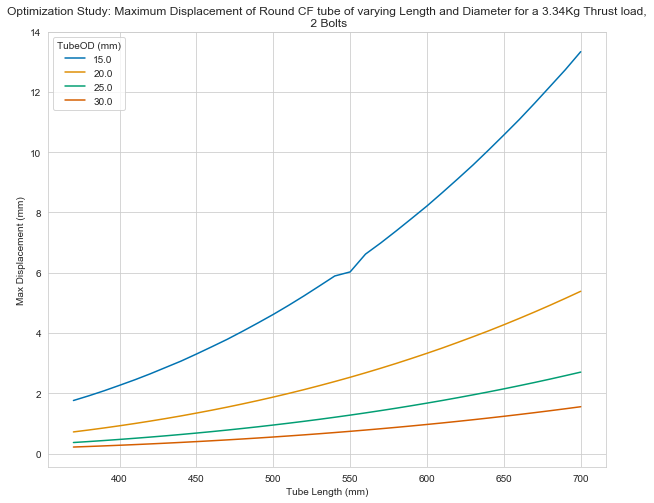

In [63]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=dispRnd2Bolts['TubeLength'],y=dispRnd2Bolts['Displacement1'],data=dispRnd2Bolts,hue=dispRnd2Bolts['TubeOD'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Max Displacement (mm)")
plt.legend(title="TubeOD (mm)")
plt.title("Optimization Study: Maximum Displacement of Round CF tube of varying Length and Diameter for a 3.34Kg Thrust load,\n 2 Bolts")
plt.show()

In [64]:
fig.savefig("Figures/F4/Rnd2BoltsDisplacement_BetterRes.png")

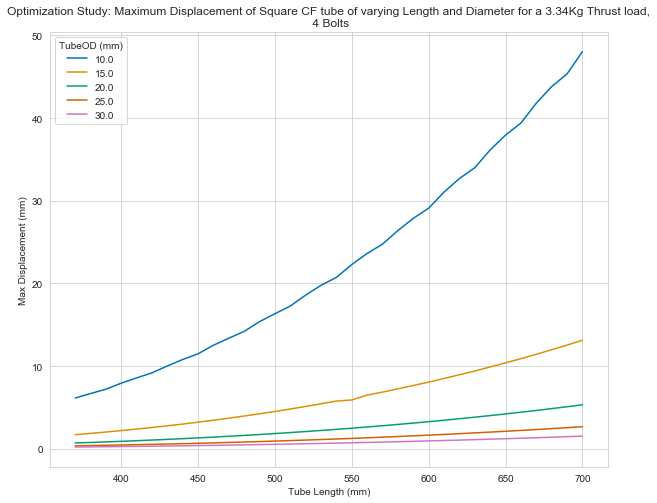

In [26]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=dispRnd4Bolts['TubeLength'],y=dispRnd4Bolts['Displacement1'],data=dispRnd4Bolts,hue=dispRnd4Bolts['TubeOD'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Max Displacement (mm)")
plt.legend(title="TubeOD (mm)")
plt.title("Optimization Study: Maximum Displacement of Square CF tube of varying Length and Diameter for a 3.34Kg Thrust load,\n 4 Bolts")
plt.show()

#### Saving Figure to an Image

In [14]:
fig.savefig("Figures/F4/SquareCFDispAnalysis20kg.png")

#### Evaluating Data Points

### Analysis on the Displacement Curve

The Displacement curve appears as to be expected. **Larger diameter** tubes displace **less** over the range of lengths of rotorbooms. This is because the strength against bending is related to the outer-diameter of the tube, thus larger ODs result in greater rigidity. The wall-thickness gives strength against impact damage and denting of the tube walls [[Ref](https://www.motortrend.com/how-to/1101or-steel-tubing-myth-of-the-tube/)].

Its worth noting that a hollow tube can provide an improved weight and strength ratio compared to a solid tube. The hollow tube will have a larger diameter than the solid tube but with a lower mass and improved rigidity. 

### Mass Curve

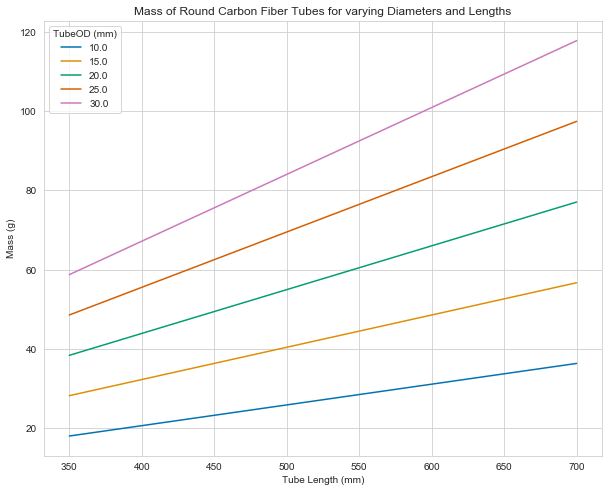

In [24]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=df['TubeLength'],y=df['Mass1'],data=df,hue=df['TubeOD'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Mass (g)")
plt.title("Mass of Round Carbon Fiber Tubes for varying Diameters and Lengths")
plt.legend(title="TubeOD (mm)")
plt.show()

## Figure n

In [ ]:
df.head()

### %%Curve

#### Saving graph to an Image

In [ ]:
fig.savefig("Figures/Fn/xxx.png")

#### Evaluating Data Points